**ENT-216N Final Project**

The topic chosen for this project is Hepatitis C. Hepatitis C is a viral infection that causes inflammation within the liver. The virus can cause both acute and chronic hepatits, ranging in severity from a mild illness to a serious, lifelong illness including liver cirrhosis and cancer. The bloodborne virus is spread through exposure to infected blood from unsafe injection practices, unsafe health care, unscreened blood transfusions, injection drug use, and sexual practices that lead to exposure to blood. When it comes to symptoms, most people do not show in the first weeks after infection. It can take between two weeks to six months for the symptoms to appear. However, Hepatitis C cannot be spread through breast milk, food, water, or casual physical contact with an infected person.

Currently, there is no vaccine for Hepatits C, however it can be treated affectively with antiviral medications. Early detection and treatment can also prevent serious liver damage and improve long-term health. The WHO reccomends therapy with pan-genotypic direct-acting ativirals for all adults, adolescents, and children with chronic hepatitis C infections. However, access to such treatments remains limited but are seeing improvements. Of the 50 million living with HCV infection globally, an estimated 36% knew their diagnosis and around 20% have been treated with DAAs by the end of 2022.  

Because there is no effective vaccine, the best way to prevent the infection is to avoid contact with the virus. Extra care and precaution should be taken in healthcare settings and for people with higher risks of the HCV infection. Examples include safe handling and disposal of needles and medical waste, harm reduction and rehabilitation services for drug abuse, testing of donated blood, practice of safe sex, and proper and regulated training of health personnel.  


In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np
from scipy import stats
import math
import pandas as pd


In order to extract the information from the csv file of blood donors and Hepatitis C patients and demographic values like age, we must import python libraries such as pandas and numpy. Scipy and math is also imported in order to perform and solve mathematical equations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set
import plotly.express as ps
import plotly.graph_objects as go
from plotly.subplots import make_subplots


Matplotlib is imported in order to create visualizations of the data and seaborn will be used to create statistical graphs. Plotly will also be imported and used in order to support the imported libraries in generating data visualizations.

In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

This imports the init notebook function from plotly and will allow interactive plots to be displayed in jupyter notebooks without connecting to an external server. It will also allow the notebook to load the necessary JavaScript files locally, enabling interactive features in the plots.

In [ ]:
%matplotlib inline

In addition, this line tells Jupyter to display matplotlib plots directly in the notebook, inlined with the notebook content.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

The warnings module is then imported which allows me to control how certain warnings are handled in Python. I then add in a line that will ignore all the warnings, regardless of its category. It will suppress all warning messages from appearing in the output in order to reduce clutter.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
file_path = '/content/gdrive/My Drive/entfinal/HepatitisCdata.csv'
df = pd.read_csv(file_path)

Mounted at /content/gdrive


Now that the initial imports of libraries and modules are completed, we can finally connect to the google drive file that contains the csv file of the blood samples of Hepatitis C patients.  


In [ ]:
HepC = df
HepC.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


After setting a variable name for the file path, I called the head() function which returns the first 5 values from the data tables in the csv file. This will help us determine what are the important information that we need and what are the ones we can exclude at first glance. From here, we can see that all attributes except Category and Sex are numerical. However, Unnamed: 0 is a column that is not necessary and can be removed from the attributes.

Within the category column, the samples of diagnosed patients and blood donors are separated into different attributes with 0 representing blood donors, 0s for suspected blood donors, 1 being Hepatitis patients, 2 being Fibrosis patients, and 3 being Cirrhosis. Through these different diagnoses, we can analyze the differences in the blood samples between these groups and perhaps come up with a prediction in suspected blood donors.  

When looking at the other columns, we can see that they represent the parameters that are measured to assess organ function, particularly liver and kidney health, as well as overall metabolism.

1. ALB (Albumin)
  *  A major protein in the blood, primarily produced by the liver. It helps maintain blood volume and carries substances like hormones and drugs throughout the body. Low levels may indicate liver disease, malnutrition, or kidney disease.

2. ALP (Alkaline Phosphatase)
  *   An enzyme found in various tissues, primarily in the liver, bone, kidneys, and bile ducts. High levels can indicate liver disease, bile duct obstruction, or bone disorders.

3. ALT (Alanine Aminotransferase)
  *  An enzyme primarily found in the liver. Elevated levels can suggest liver damage, such as from hepatitis or circulation, or conditions that cause liver stress.

4. AST (Aspartate Aminotransferase)
  *  An enzyme found in the liver, heart, muscles, and other organs. Elevated levels can indicate liver damage, heart damage, or muscle injury.

5. BIL (Bilirubin)
  *  A byproduct of the breakdown of red blood cells, processed by the liver, and excreted in bile. High levels can indicate liver disease, bile duct blockage, or increased red blood cell breakdown.

6. CHE (Cholinesterase)
  *  An enzyme involved in breaking down acetylcholine, a neurotransmitter. It can indicate liver function, with low levels suggesting liver damage.

7. CHOL (Cholesteral)
  *  A lipid molecule crucial for cell membranes and hormone production. High levels can indicate an increased risk of cardiovascular disease.

8. CREA (Creatinine)
  *   A waste product of muscle metabolism, excreted by the kidneys. High levels can indicate kidney dysfunction.

9. GGT (Gamma-Glutamyl Transferase)
  *   An enzyme in the liver and bile ducts. Elevated levels can indicate liver or bile duct damage, often linked to alcohol use or drug toxicity.

10. PROT (Total Protein)
  *  The total amount of protein in the blood, including albumin and globulins. It reflects nutritional status, liver function, and immune system health.









In [ ]:
HepC.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [ ]:
new_table = HepC.drop(['Unnamed: 0'], axis=1)
new_table

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


The drop() function allows us to remove a specific column

In [ ]:
new_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


By calling the info() function, we are now able to see a concise summary of our current dataframe after the changes were made to the columns.

In [ ]:
new_table.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


Since we only looked at a summary of the dataframe, I then called the describe() function which generates desriptive statiatics that summarize the central tendency, dispersion and shape of a dataset's distribution

In [ ]:
new_table.shape

(615, 13)

In [ ]:
new_table["Category"].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

Because we only looked at the entire sample, I want to extract the value counts of how many blood donors, suspected donors, and patients with specific diagnoses there are. This is important because it gives us how many samples we are working with when we compare the blood samples of Hepatitis patients with blood donors and suspected blood donors.

In [ ]:
new_table.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

However, it is extremely important take into count of missing values when it comes to analyzing a dataset. The isnull() function alone will return a boolean value that indicates whether or not an attribute contains no valid data, therefore making it "null". Because this line also connects it with the sum() function, it will now return the total count how many missing values there are within the table.

In [ ]:
df = new_table.dropna(subset=['ALB', 'ALT', 'PROT','ALP','CHOL'])

In [ ]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

In [ ]:
df.shape

(589, 13)

Null values can cause problems in data mining because they can reduce the sample size, distort the statistics, and affect the performance of the algorithms. Because it can result in errors, it is important to remove them from the data set. The dropna() function removes the null values and in order to remove them from specific columns, I specified which contained the values through the subset variable.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

Since the dataset has been cleaned up, we can now download and import in modules and functions from the Scikit-learn library. These tools can provide things such as splitting datasets, performing model validation and tuning, evaluating model performance, working with support vector machines, creating 3D plots, standardizing data, and encoding categorical labels for machine learning tasks.

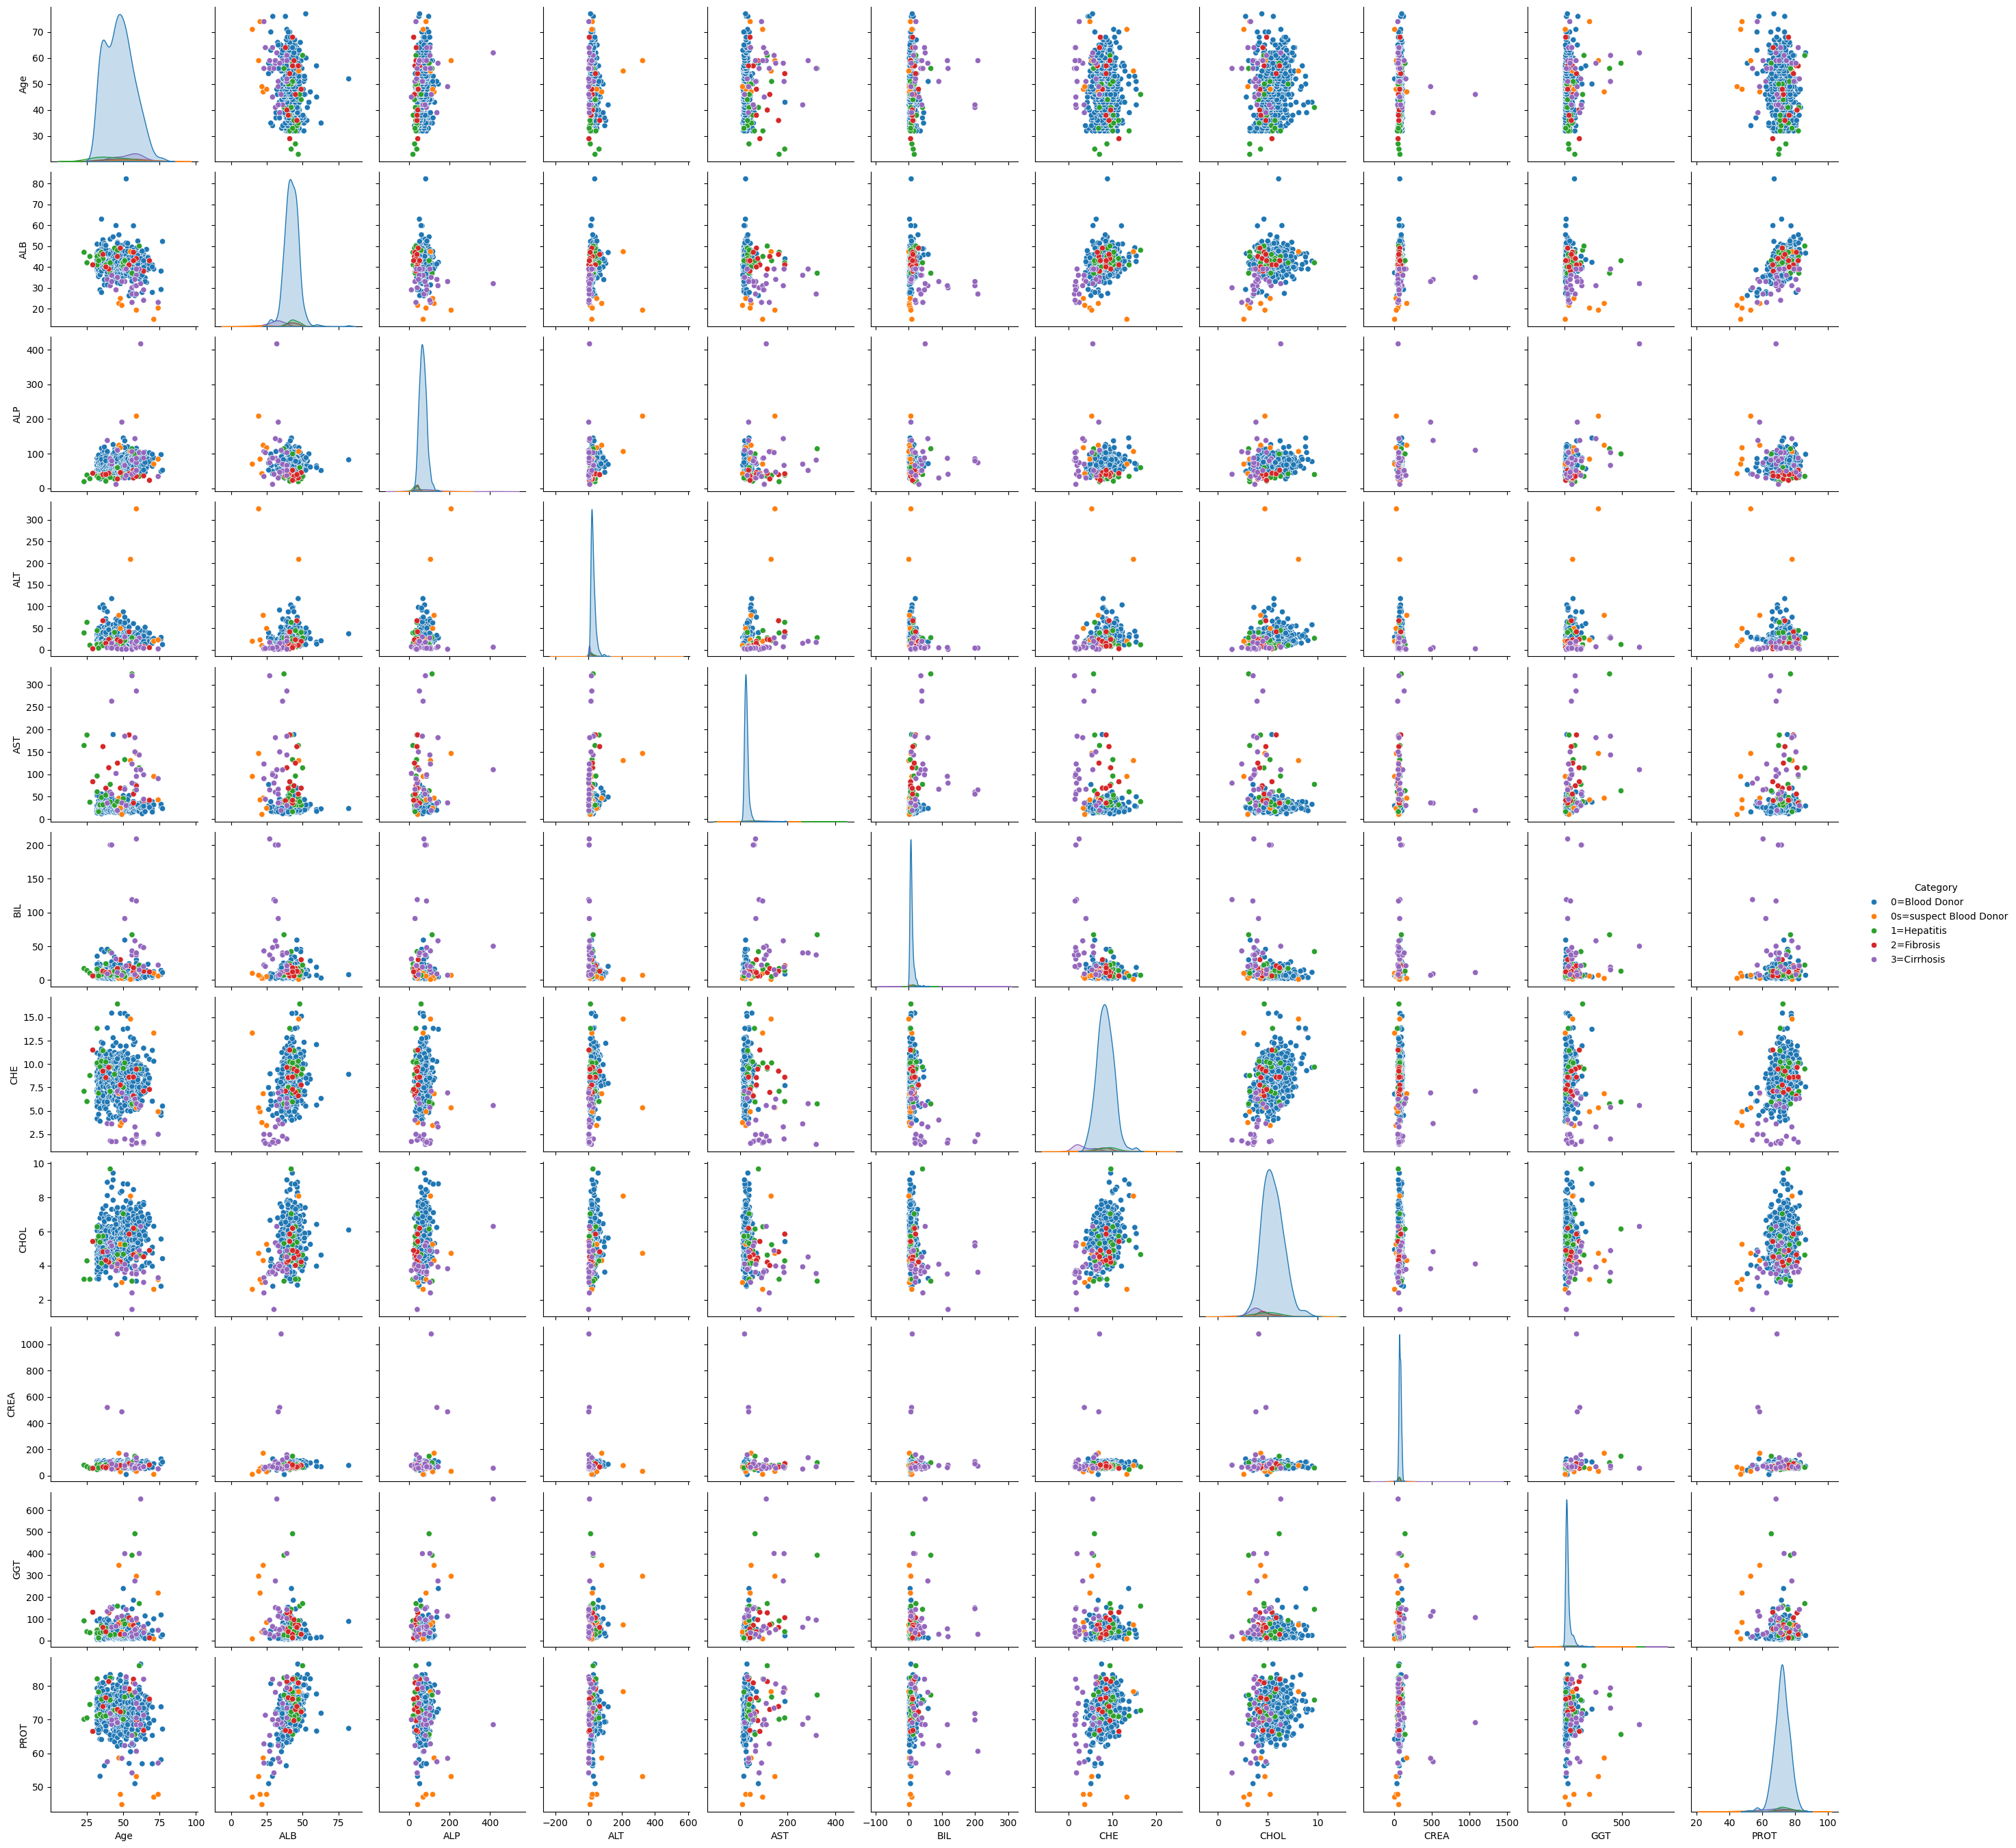

In [ ]:
sns.pairplot(df, hue="Category", vars=["Age", "ALB", "ALP", "ALT","AST","BIL","CHE","CHOL","CREA","GGT","PROT"])
plt.show()

Using Seaborn, I want to create a grid of scatter plots, displaying pairwise relationships among the variables. Age and the blood sample parameters were chosen as these variables because of how the organs, especially the liver and kidneys, will function differently based on the different age groups.

Visualizing the correlations through a scatterplot grid shows how the 5 different categories of samples compare to one another. From here, I can look for any linear correlation similarities between Hepatitis patient samples and the regular and suspected blood donors.  

In [ ]:
df.Category.unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [ ]:
df['Category'] = df['Category'].map({'0=Blood Donor': 0, '0s=suspect Blood Donor': 0,
                                     "1=Hepatitis" : 1, "2=Fibrosis" : 1, "3=Cirrhosis" : 1})

df['Sex'] = df['Sex'].map({'m': 1, 'f': 2})

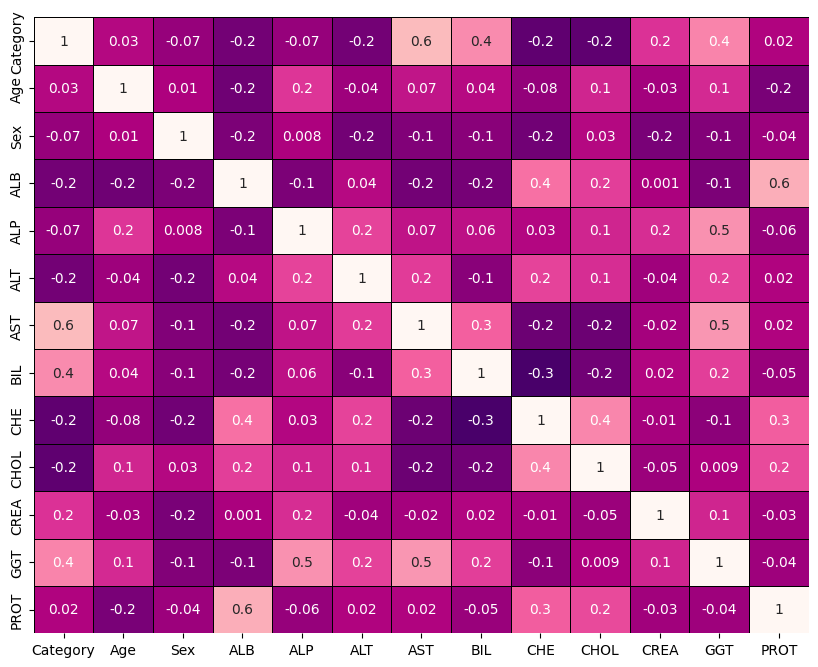

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="RdPu_r", cbar=False, linewidths=0.5, linecolor='black');


In addition to the scatterplot grid, a correlation matrix can be helpful in supporting the visual correlations between each attributes. Although we cannot see the differences in the categories like the scatterplot, the matrix shows us the correlation coefficient and allows us to make early hypotheses based on it.

In [ ]:
X = df.drop("Category", axis=1)

Now that we have seen a visualization of the correlations, we can now go ahead and try to predict if a sample person has Hepatitis C or not. Since Category is a non-numeric variable, we must remove it from the dataset table.

In [ ]:
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [ ]:
X.shape

(589, 12)

In [ ]:
Y = df["Category"]
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Category, dtype: int64

In [ ]:
Y.shape

(589,)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(471, 118)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
regress = LogisticRegression()
regress.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
LogisticRegressionScore = regress.score(X_test, Y_test)
print("Logistic Regression Model Accuracy:",LogisticRegressionScore*100)

Logistic Regression Model Accuracy: 95.76271186440678


In [ ]:
y_pred_lr = regress.predict(X_test)
print(metrics.classification_report(Y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       101
           1       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118



In [ ]:
accuracy = accuracy_score(Y_test, y_pred_lr)
print('Sklearn Accuracy Score: {:.4f}'.format(accuracy))

Sklearn Accuracy Score: 0.9576


In [ ]:
y_pred_array = regress.predict(X_test)
y_pred_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
accuracy = accuracy_score(Y_test, y_pred_array)
print('Sklearn Accuracy Score: {:.4f}'.format(accuracy))

Sklearn Accuracy Score: 0.9576


One way in predicting Hepatitis in patients was the logistic regression model. In order to set labels, I made Category as the y label/axis and the rest of the data as the x label/axis.

In order to perform the regression model, the dataset must be trained and the train_test_split functions allows us to perform that. The data is divided into two subsets: one for training and one for testing. The test_size=0.2 parameter indicates that 20% of the data will be allocated to the test set, while the remaining 80% will be used for training. The data to be split includes feature data X and target labels Y. Then, the random_state=42 parameter ensures that the data is split in the same way each time the code is run. (X_train, X_test, Y_train, Y_test) receives the outputs from train_test_split, dividing the dataset into training and test sets. X_train and Y_train contain the feature data and corresponding labels for the training set, while X_test and Y_test contain the same for the test set.  

The data then becomes scaled and the logistic regression function is implemented. We then go into calculating the accuracy of this regression model and prints it out into a percentage. As a result, there is a 95.76% accuracy of this model correctly predicting Hepatitis C in patients. I then implemented a classification report which compares the true labels (Y_test) with the predicted labels (y_pred_lr) and calculates various metrics that assess the model's performance. This is beneficial because it gives a more comprehensive view compared to a single accuracy score.

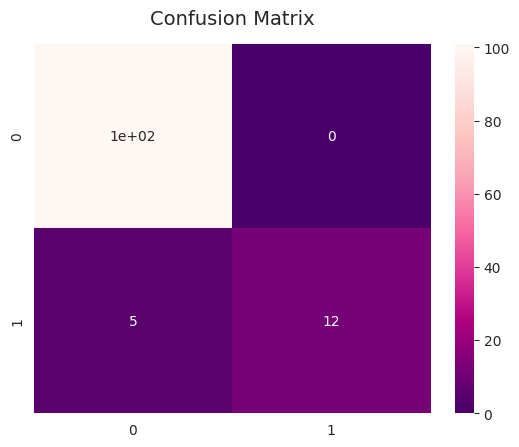

In [ ]:
sns.set_style("white")
y_pred_lr = regress.predict(X_test)
cf_matrix = confusion_matrix(Y_test, y_pred_lr)
sns.heatmap(cf_matrix, annot=True, cmap="RdPu_r")
plt.title("Confusion Matrix", fontsize=14, y=1.03);

Because the accuracy score alone is not enough, we need to do a confusion matrix in order to support our conclusions. It provides a detailed view of how well the model predicts each class, allowing us to see where it performs well and where it might be making errors. Since it also shows us a distribution of correct and incorrect predictions, it helps us understand if the model is biased toward a specific class or if it tends to misclassify certain cases.

**CITATIONS**

World Health Organization. (n.d.). Hepatitis C. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/hepatitis-c#:~:text=Hepatitis%20C%20is%20an%20inflammation,including%20liver%20cirrhosis%20and%20cancer.

Examples#. Examples - Matplotlib 3.8.4 documentation. (n.d.). https://matplotlib.org/stable/gallery/index

Examples. scikit. (n.d.). https://scikit-learn.org/stable/auto_examples/index.html   

Example gallery#. Example gallery - seaborn 0.13.2 documentation. (n.d.). https://seaborn.pydata.org/examples/index.html  


Dataset origin: https://archive.ics.uci.edu/dataset/571/hcv+data